In [72]:
!pip install pandas

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
file_path = r'/content/drive/MyDrive/processeduimadataset.csv'  # Update with your file path
data = pd.read_csv(file_path, encoding='latin1')


In [76]:
data.head()

,question_id,title,tags,score,view_count,answer_count,body,user_id,user_reputation,creation_date,...,text_readability,cleaned_body,sentiment_polarity,no_of_comments,NormalizedClarity,NormalizedComplexity,NormalizedEngagement,NormalizedQuality,NormalizedRelevance,ComprehensibilityScore
0,70757929,Can I calculate the p-value and add asterisk u...,"python, plotly, boxplot, plotly-python",3,793.0,1.0,"<p>For example, we have dataset <code>tips</co...",17418636,92,2022-01-18 15:11:00,...,12.29,"<p>For example, we have dataset <code>tips</co...",0.128125,0,8.104531,6.859286,264.666667,10.000000,0.375000,70.001371
1,70757351,How do I convert .asc data of CAN to .blf usin...,"python, python-3.x, vector, ascii, can-bus",1,2610.0,1.0,"<p>I have a .asc file, I want to convert it to...",12415637,463,2022-01-18 14:35:00,...,73.95,"<p>I have a .asc file, I want to convert it to...",0.500000,0,21.112500,10.347571,870.333333,5.000000,0.100000,225.473351
2,70742672,Pandas `.assign` to multiple columns from sing...,"python, pandas",2,2122.0,4.0,<p>I have a Pandas dataframe which contains a ...,1856357,294,2022-01-17 14:07:00,...,56.35,<p>I have a Pandas dataframe which contains a ...,-0.111987,0,17.809503,6.856214,708.666667,7.500000,0.500000,183.458096
3,70741223,Removing one of the two installed Jupyters,"python, jupyter-notebook, anaconda, homebrew",-2,382.0,2.0,"<p>In my system, by mistake, a second Jupyter ...",7395606,173,2022-01-17 12:18:00,...,54.83,"<p>In my system, by mistake, a second Jupyter ...",0.018939,2,16.212235,5.839286,128.666667,5.000000,0.625000,37.835797
4,70807223,Doctest: How can I identify differences betwee...,"python, pandas, doctest",2,199.0,1.0,"<p>In the below doctest, the expected and actu...",14193915,811,2022-01-21 20:19:00,...,53.17,"<p>In the below doctest, the expected and actu...",-0.014286,3,15.831451,7.770714,67.666667,5.085045,0.666667,22.983875


In [77]:
data['score'] = pd.to_numeric(data['score'], errors='coerce', downcast='integer')

In [78]:
data = data.dropna(subset=['score'])

In [79]:
score = data['score'].astype(int)

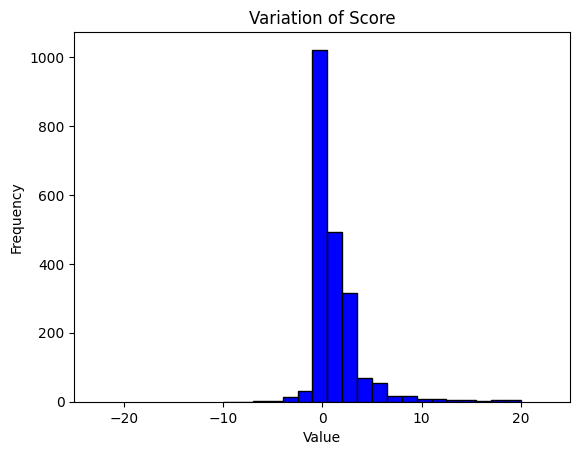

In [80]:
import matplotlib.pyplot as plt


plt.hist(data['score'], bins=20, range=(-10, 20), color='blue', edgecolor='black')
plt.title('Variation of Score')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(-25, 25)  # Set the x-axis range
plt.show()


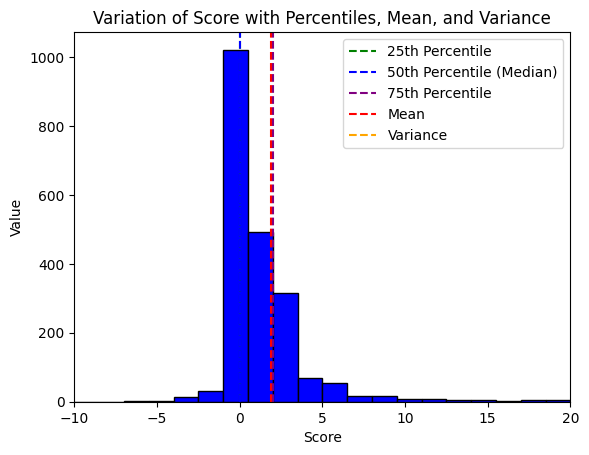

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['score'], bins=20, range=(-10, 20), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['score'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['score'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['score'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['score'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['score'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(-10, 20)

# Set labels and title
plt.title('Variation of Score with Percentiles, Mean, and Variance')
plt.xlabel('Score')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()


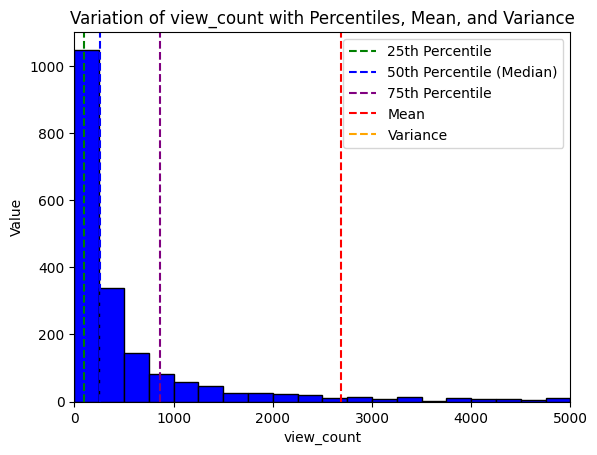

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['view_count'], bins=20, range=(0, 5000), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['view_count'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['view_count'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['view_count'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['view_count'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['view_count'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(0, 5000)

# Set labels and title
plt.title('Variation of view_count with Percentiles, Mean, and Variance')
plt.xlabel('view_count')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

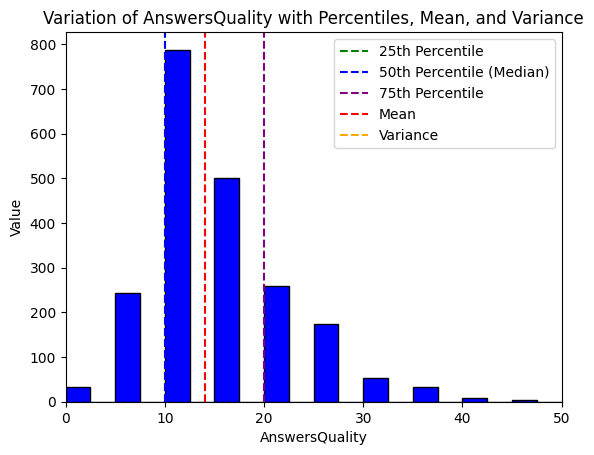

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['AnswersQuality'], bins=20, range=(0, 50), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['AnswersQuality'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['AnswersQuality'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['AnswersQuality'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['AnswersQuality'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['AnswersQuality'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(0, 50)

# Set labels and title
plt.title('Variation of AnswersQuality with Percentiles, Mean, and Variance')
plt.xlabel('AnswersQuality')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

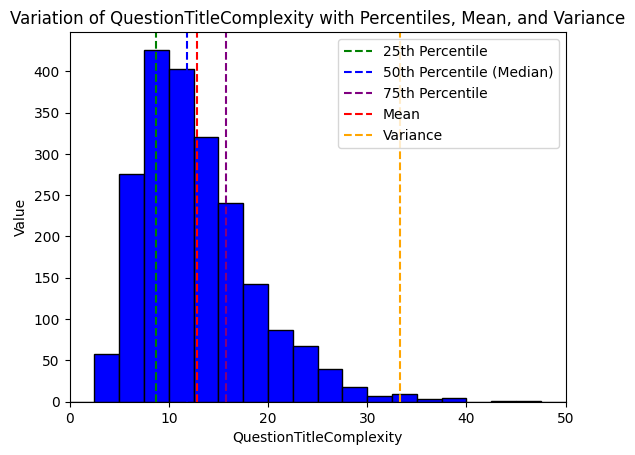

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['QuestionTitleComplexity'], bins=20, range=(0, 50), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['QuestionTitleComplexity'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['QuestionTitleComplexity'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['QuestionTitleComplexity'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['QuestionTitleComplexity'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['QuestionTitleComplexity'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(0, 50)

# Set labels and title
plt.title('Variation of QuestionTitleComplexity with Percentiles, Mean, and Variance')
plt.xlabel('QuestionTitleComplexity')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

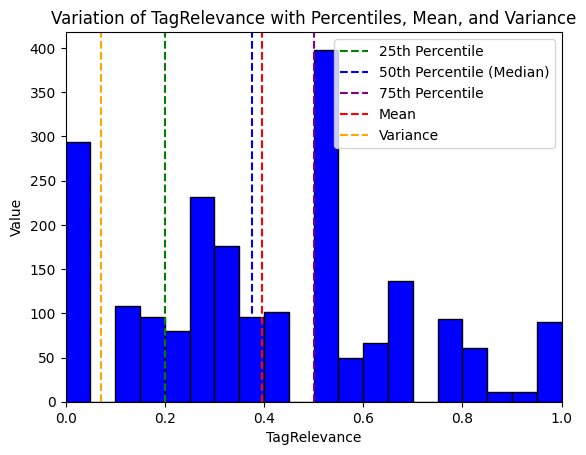

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['TagRelevance'], bins=20, range=(0, 1), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['TagRelevance'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['TagRelevance'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['TagRelevance'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['TagRelevance'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['TagRelevance'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(0, 1)

# Set labels and title
plt.title('Variation of TagRelevance with Percentiles, Mean, and Variance')
plt.xlabel('TagRelevance')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

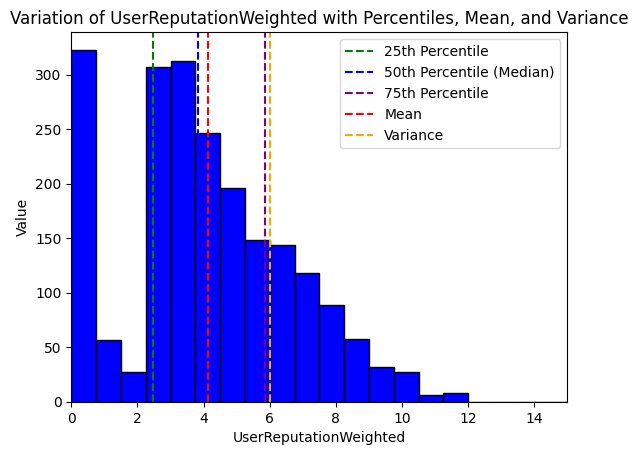

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['UserReputationWeighted'], bins=20, range=(0, 15), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['UserReputationWeighted'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['UserReputationWeighted'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['UserReputationWeighted'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['UserReputationWeighted'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['UserReputationWeighted'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(0, 15)

# Set labels and title
plt.title('Variation of UserReputationWeighted with Percentiles, Mean, and Variance')
plt.xlabel('UserReputationWeighted')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

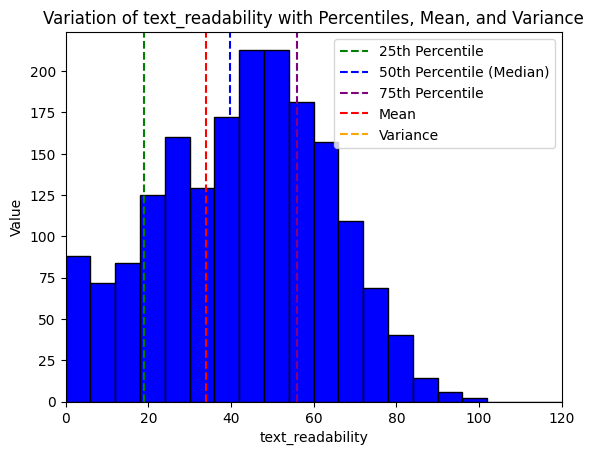

In [87]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['text_readability'], bins=20, range=(0, 120), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['text_readability'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['text_readability'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['text_readability'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['text_readability'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['text_readability'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(0, 120)

# Set labels and title
plt.title('Variation of text_readability with Percentiles, Mean, and Variance')
plt.xlabel('text_readability')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

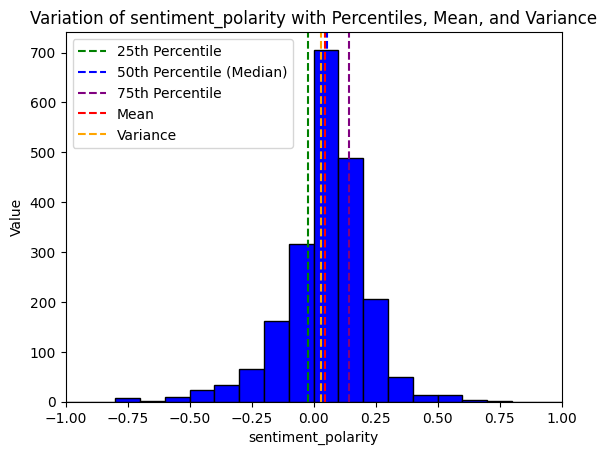

In [88]:


import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['sentiment_polarity'], bins=20, range=(-1, 1), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['sentiment_polarity'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['sentiment_polarity'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['sentiment_polarity'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['sentiment_polarity'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['sentiment_polarity'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(-1, 1)

# Set labels and title
plt.title('Variation of sentiment_polarity with Percentiles, Mean, and Variance')
plt.xlabel('sentiment_polarity')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

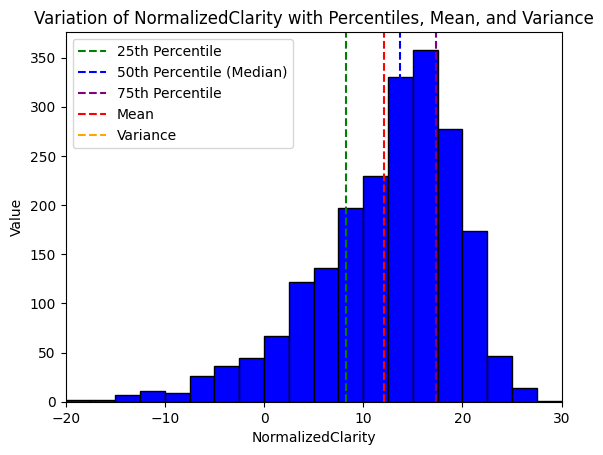

In [89]:


import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['NormalizedClarity'], bins=20, range=(-20, 30), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['NormalizedClarity'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['NormalizedClarity'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['NormalizedClarity'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['NormalizedClarity'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['NormalizedClarity'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(-20, 30)

# Set labels and title
plt.title('Variation of NormalizedClarity with Percentiles, Mean, and Variance')
plt.xlabel('NormalizedClarity')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

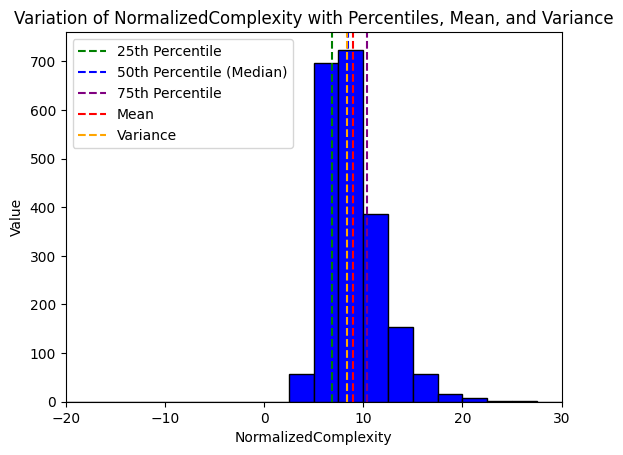

In [90]:


import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['NormalizedComplexity'], bins=20, range=(-20, 30), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['NormalizedComplexity'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['NormalizedComplexity'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['NormalizedComplexity'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['NormalizedComplexity'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['NormalizedComplexity'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(-20, 30)

# Set labels and title
plt.title('Variation of NormalizedComplexity with Percentiles, Mean, and Variance')
plt.xlabel('NormalizedComplexity')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

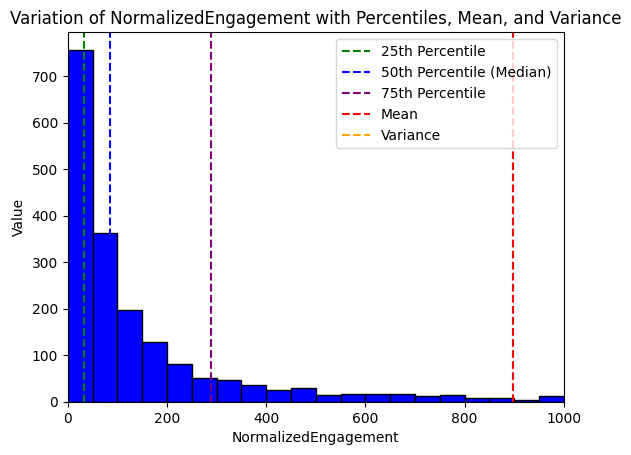

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['NormalizedEngagement'], bins=20, range=(0, 1000), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['NormalizedEngagement'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['NormalizedEngagement'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['NormalizedEngagement'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['NormalizedEngagement'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['NormalizedEngagement'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(0, 1000)

# Set labels and title
plt.title('Variation of NormalizedEngagement with Percentiles, Mean, and Variance')
plt.xlabel('NormalizedEngagement')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

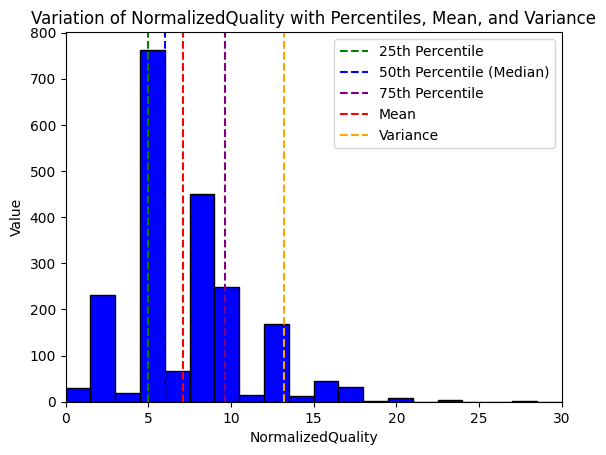

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['NormalizedQuality'], bins=20, range=(0, 30), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['NormalizedQuality'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['NormalizedQuality'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['NormalizedQuality'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['NormalizedQuality'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['NormalizedQuality'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(0, 30)

# Set labels and title
plt.title('Variation of NormalizedQuality with Percentiles, Mean, and Variance')
plt.xlabel('NormalizedQuality')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

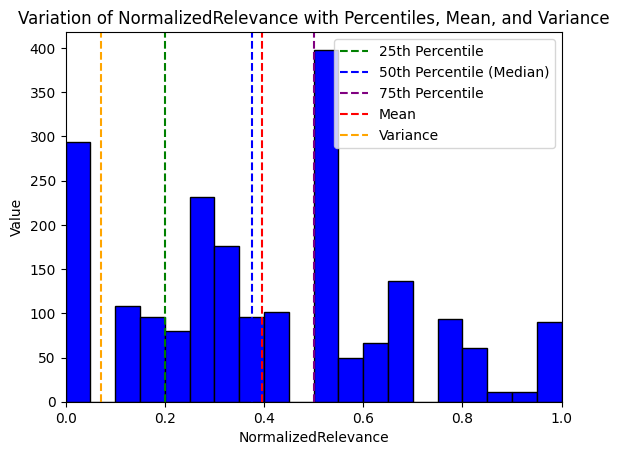

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'data' and the column is 'score'
# Replace 'score' with the actual column name in your dataset

# Create the histogram
plt.hist(data['NormalizedRelevance'], bins=20, range=(0, 1), color='blue', edgecolor='black')

# Plot vertical lines for 25th, 50th, and 75th percentiles, mean, and variance
plt.axvline(data['NormalizedRelevance'].quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(data['NormalizedRelevance'].median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(data['NormalizedRelevance'].quantile(0.75), color='purple', linestyle='--', label='75th Percentile')
plt.axvline(data['NormalizedRelevance'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['NormalizedRelevance'].var(), color='orange', linestyle='--', label='Variance')

# Set the x-axis range
plt.xlim(0, 1)

# Set labels and title
plt.title('Variation of NormalizedRelevance with Percentiles, Mean, and Variance')
plt.xlabel('NormalizedRelevance')
plt.ylabel('Value')

# Show legend
plt.legend()

# Show the plot
plt.show()

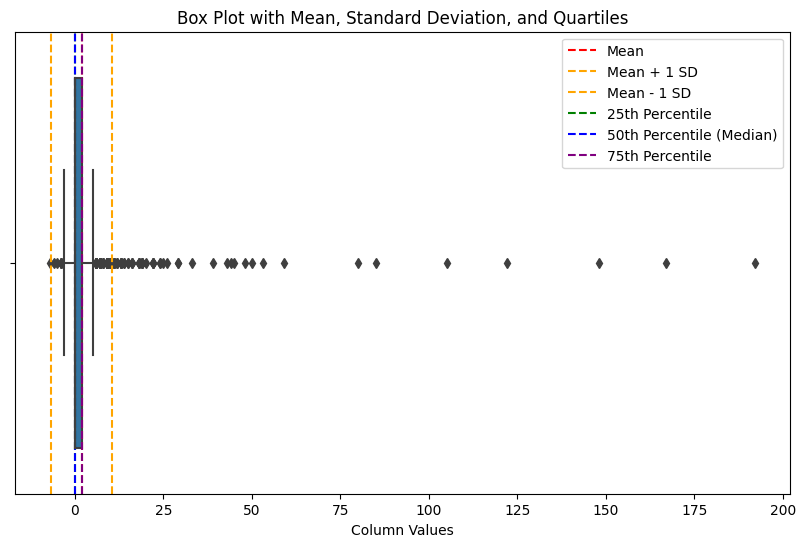

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'data' and the column is 'column_name'
# Replace 'column_name' with the actual column name in your dataset

plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x=score)

# Add mean and standard deviation as reference lines
plt.axvline(x=score.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=score.mean() + score.std(), color='orange', linestyle='--', label='Mean + 1 SD')
plt.axvline(x=score.mean() - score.std(), color='orange', linestyle='--', label='Mean - 1 SD')

# Add quartiles
plt.axvline(x=score.quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axvline(x=score.median(), color='blue', linestyle='--', label='50th Percentile (Median)')
plt.axvline(x=score.quantile(0.75), color='purple', linestyle='--', label='75th Percentile')

plt.title('Box Plot with Mean, Standard Deviation, and Quartiles')
plt.xlabel('Column Values')
plt.legend()
plt.show()


In [95]:
df = data

In [96]:

X = df.drop('ComprehensibilityScore', axis=1)  # Replace 'target_column' with your actual target column name
y = df['ComprehensibilityScore']


In [97]:
columns_to_use = ['score', 'view_count', 'answer_count', 'user_reputation', 'CommentsQuality', 'TagRelevance', 'UserReputationWeighted', 'text_readability', 'sentiment_polarity', 'no_of_comments', 'NormalizedClarity', 'NormalizedComplexity', 'NormalizedEngagement', 'NormalizedQuality', 'NormalizedRelevance']

X = X[columns_to_use].copy()


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
X_train

,score,view_count,answer_count,user_reputation,CommentsQuality,TagRelevance,UserReputationWeighted,text_readability,sentiment_polarity,no_of_comments,NormalizedClarity,NormalizedComplexity,NormalizedEngagement,NormalizedQuality,NormalizedRelevance
1593,-1.0,222.0,2.0,1,0.000000,0.000000,0.693147,71.71,0.000000,1,19.177500,10.536857,75.000000,2.500000,0.000000
829,7.0,4342.0,6.0,3440,0.000000,0.333333,8.143517,10.16,0.000000,0,8.790000,5.547857,1449.333333,12.500000,0.333333
414,1.0,350.0,1.0,923,0.000000,0.125000,6.828712,60.31,0.000000,1,15.077500,9.682143,117.333333,0.000000,0.125000
704,-2.0,103.0,3.0,11,-0.776786,0.500000,2.484907,78.55,0.250000,5,22.005804,9.278571,37.000000,4.611607,0.500000
755,0.0,55.0,1.0,3671,0.000000,0.125000,8.208492,52.60,-0.107143,0,14.373214,5.263286,18.666667,2.500000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,0.0,52.0,1.0,41,0.000000,0.200000,3.737670,-3.89,-0.007425,0,2.775644,7.478286,17.666667,7.500000,0.200000
1096,3.0,94.0,1.0,56,0.166667,0.600000,4.043051,45.22,0.025000,1,13.852917,6.346429,32.000000,5.083333,0.600000
1131,0.0,282.0,1.0,21,0.000000,0.500000,3.091042,27.59,0.068182,0,10.664545,8.776857,94.333333,7.500000,0.500000
1295,2.0,740.0,3.0,61,0.000000,0.800000,4.127134,53.92,-0.333333,0,15.896667,10.115000,247.666667,5.000000,0.800000


In [100]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [101]:
y_pred = rf_model.predict(X_test)


In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
gb_mse = mean_squared_error(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", gb_mse)
print("R-squared:", gb_r2)
print(f'Mean Absolute Error: {mae:.2f}')


Mean Squared Error: 40747.48569657677
R-squared: 0.9711215393455417
Mean Absolute Error: 18.63
